In [2]:
library(DescTools) #Fisher Z
library(tidyverse)
library(rstatix) #ANOVA
library(reshape)#melt
library(ggpubr) #compare means
library(ggplot2)
library(plotly)

# Import data

In [3]:
raw_loocv = read.csv('../output_data/model_comparison/LOOCV/raw_loocv.csv',row.names=1)
dimension_model_loocv = read.csv('../output_data/model_comparison/LOOCV/dimension_model_loocv.csv',row.names=1)
clustering_model_loocv = read.csv('../output_data/model_comparison/LOOCV/clustering_model_loocv.csv',row.names=1)
clustering_model_loocv = clustering_model_loocv[,c('exp','imp','dim_umap')]

In [4]:
task_compare = data.frame(matrix(rep(0,9),nrow=3,ncol=3))
rownames(task_compare) = c('Free Categorization','Multi-arrangement','Dimensional survey')
colnames(task_compare) = c('raw','cluster','dimensional')

task_compare[,'raw'] = colMeans(raw_loocv)
task_compare[,'cluster'] = colMeans(dimension_model_loocv)
task_compare[,'dimensional'] = colMeans(clustering_model_loocv[1:3])

task_compare['Task'] = rownames(task_compare) 
task_compare_melt = melt(task_compare,id.vars=c('Task'))

# Plot results

png 
  2

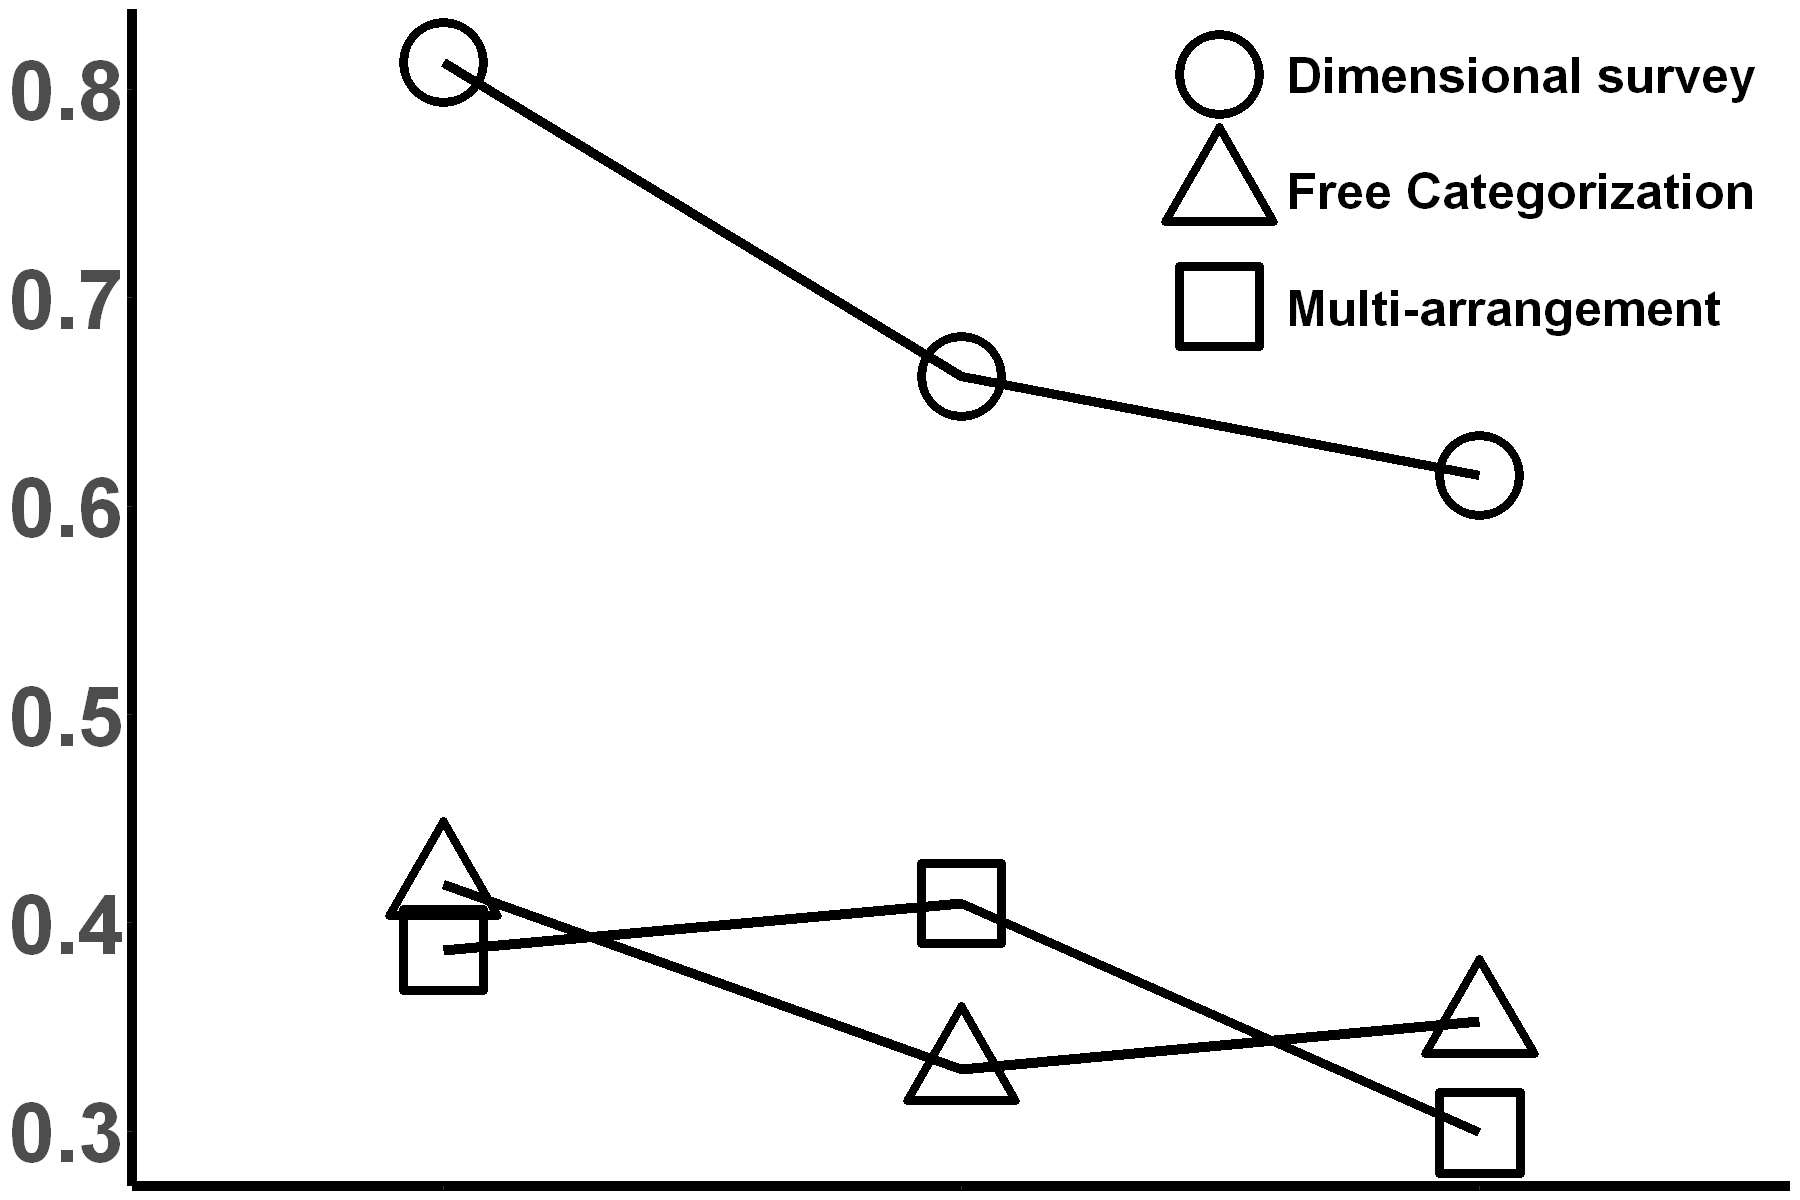

In [12]:
options(repr.plot.width = 15,repr.plot.height = 10)
ggplot(task_compare_melt,aes(x=variable,y=value))+
geom_point(aes(shape=Task),size = 20,stroke=4)+
geom_line(aes(group = Task),lwd = 3)+
scale_shape_manual(values = c('Dimensional survey'=1,'Free Categorization'=2,'Multi-arrangement'=0))+

theme_classic()+
theme(#axis.text.x=element_text(size=40,face='bold'),
      axis.text.x=element_blank(),
      axis.text.y=element_text(size=50,face='bold'),
      axis.title.x=element_blank(),
      #axis.title.y=element_text(size=50,face='bold'),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_blank(),
      legend.key.size = unit(70,'pt'),
      legend.text=element_text(face="bold",size=30),
      legend.position=c(0.8,0.85))+
guides(shape=guide_legend(ncol=1))+
ylab('LOOCV')


png("../output_graph/TaskComparison.png", bg="transparent",
    family = 'sans',units='in',width=15,height=10,res=300)
ggplot(task_compare_melt,aes(x=variable,y=value))+
geom_point(aes(shape=Task),size = 20,stroke=4)+
geom_line(aes(group = Task),lwd = 3)+
scale_shape_manual(values = c('Dimensional survey'=1,'Free Categorization'=2,'Multi-arrangement'=0))+

theme_classic()+
theme(#axis.text.x=element_text(size=40,face='bold'),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.title.x=element_blank(),
      #axis.title.y=element_text(size=50,face='bold'),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_blank(),
      legend.key.size = unit(60,'pt'),
      legend.text=element_text(face="bold",size=30),
      legend.position='none')+
guides(shape=guide_legend(ncol=1))+
ylab('LOOCV')
dev.off()